In [ ]:
!pip install tensorflow keras numpy pandas opencv-python kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poornasaikrishna1","key":"3e2852f31712edd74fe141c2191b6238"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0725.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0726.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0727.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0728.jpg  
  inflating: dataset/Training/g

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define dataset path
dataset_path = "dataset"  # Update this if needed

# Image size for EfficientNet
IMG_SIZE = 224
BATCH_SIZE = 32

# Data Preprocessing & Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# Load Train and Validation Data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 119s 668ms/step - accuracy: 0.2600 - loss: 1.4100 - val_accuracy: 0.2796 - val_loss: 1.3834
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 110s 530ms/step - accuracy: 0.2761 - loss: 1.3821 - val_accuracy: 0.2796 - val_loss: 1.3832
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 76s 535ms/step - accuracy: 0.2749 - loss: 1.3849 - val_accuracy: 0.2796 - val_loss: 1.3829
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 74s 516ms/step - accuracy: 0.2886 - loss: 1.3814 - val_accuracy: 0.2796 - val_loss: 1.3827
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 74s 521ms/step - accuracy: 0.2729 - loss: 1.3840 - val_accuracy: 0.2796 - val_loss: 1.3842
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 76s 535ms/step - accuracy: 0.2848 - loss: 1.3842 - val_accuracy: 0.2796 - val_loss: 1.3836
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 78s 543ms/step - accuracy: 0.2806 - loss: 1.3836 - val_accuracy: 0.2796 - val_loss: 1.3834
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 74s 517ms/step - accuracy: 0.2830 - loss:

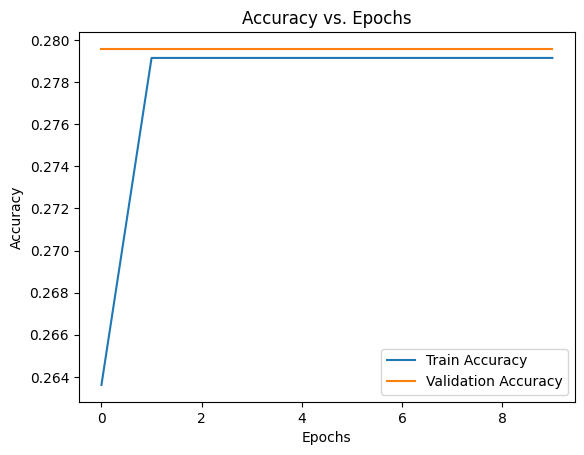

Found 1311 images belonging to 4 classes.
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 286ms/step


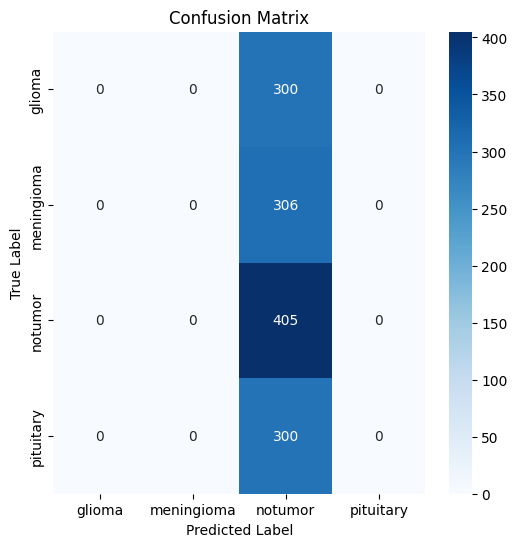

              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       300
  meningioma       0.00      0.00      0.00       306
     notumor       0.31      1.00      0.47       405
   pituitary       0.00      0.00      0.00       300

    accuracy                           0.31      1311
   macro avg       0.08      0.25      0.12      1311
weighted avg       0.10      0.31      0.15      1311



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Define dataset path
train_dir = "/content/dataset/Training"
test_dir = "/content/dataset/Testing"

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation split
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training")

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation")

# Load EfficientNetB0 without top layers
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4, activation="softmax")  # 4 classes
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.show()

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical", shuffle=False
)

# Get true labels and predictions
Y_pred = model.predict(test_generator)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert to class indices
Y_true = test_generator.classes  # True labels

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
labels = list(test_generator.class_indices.keys())  # Class names

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(Y_true, Y_pred_classes, target_names=labels))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, classification_report

# Define paths
data_dir = "/content/dataset/"
train_dir = data_dir + "Training"
test_dir = data_dir + "Testing"

# Image data generators
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = data_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
val_data = data_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# Model setup
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=50)

# Save model
model.save("brain_tumor_efficientnet.h5")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

# Confusion Matrix
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 77s 309ms/step - accuracy: 0.3948 - loss: 1.2593 - val_accuracy: 0.3304 - val_loss: 1.2558
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - accuracy: 0.4661 - loss: 1.1566 - val_accuracy: 0.5311 - val_loss: 1.2762
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - accuracy: 0.4850 - loss: 1.1280 - val_accuracy: 0.5460 - val_loss: 1.2033
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.5028 - loss: 1.1001 - val_accuracy: 0.3506 - val_loss: 1.2402
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.5092 - loss: 1.0740 - val_accuracy: 0.3190 - val_loss: 1.2522
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.5022 - loss: 1.0932 - val_accuracy: 0.4172 - val_loss: 1.2818
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.5006 - loss: 1.0873 - val_accuracy: 0.4812 - val_loss: 1.1956
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.4908 - loss: 1.0844 - val

KeyboardInterrupt: 

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 79s 320ms/step - accuracy: 0.3907 - loss: 1.2353 - val_accuracy: 0.5206 - val_loss: 1.2423
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.4556 - loss: 1.1468 - val_accuracy: 0.3996 - val_loss: 1.2419
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - accuracy: 0.4875 - loss: 1.1043 - val_accuracy: 0.3181 - val_loss: 1.3946
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.4567 - loss: 1.1303 - val_accuracy: 0.5004 - val_loss: 1.2025
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.4870 - loss: 1.1004 - val_accuracy: 0.3506 - val_loss: 1.4007
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.4836 - loss: 1.0868 - val_accuracy: 0.5066 - val_loss: 1.2738
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - accuracy: 0.4985 - loss: 1.0917

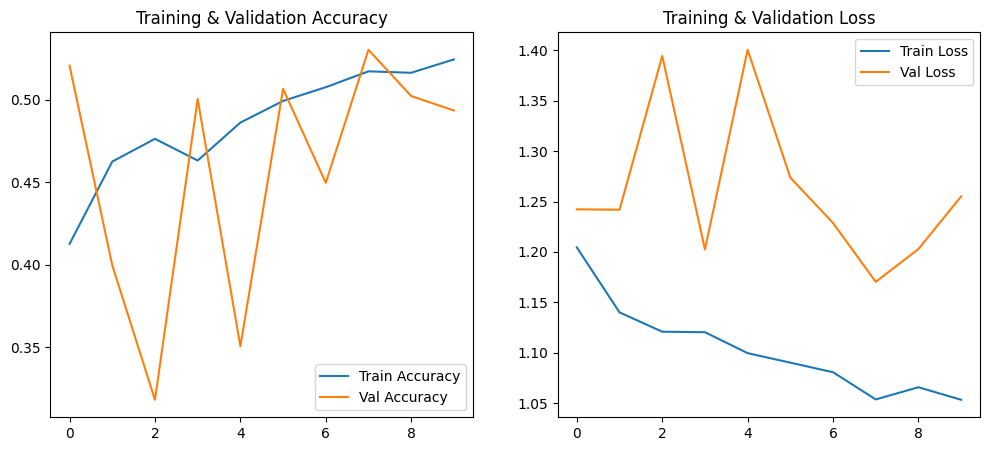

41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 303ms/step


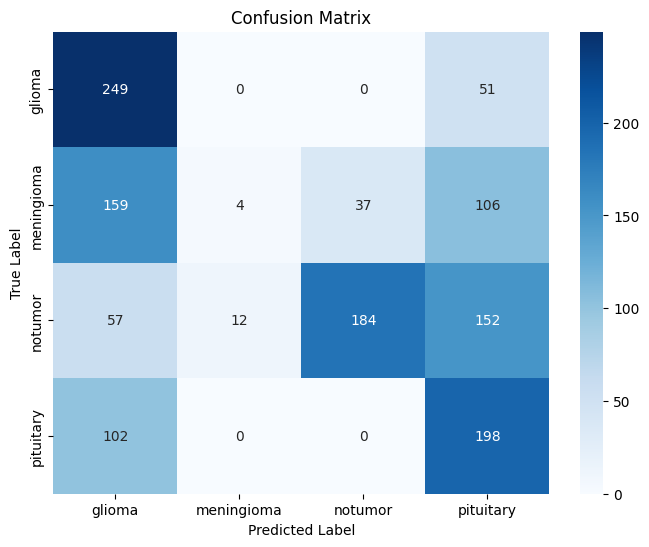


Classification Report:
              precision    recall  f1-score   support

      glioma       0.44      0.83      0.57       300
  meningioma       0.25      0.01      0.02       306
     notumor       0.83      0.45      0.59       405
   pituitary       0.39      0.66      0.49       300

    accuracy                           0.48      1311
   macro avg       0.48      0.49      0.42      1311
weighted avg       0.51      0.48      0.43      1311



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, classification_report

# Define paths
data_dir = "/content/dataset/"
train_dir = data_dir + "Training"
test_dir = data_dir + "Testing"
# Image data generators
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = data_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
val_data = data_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# Model setup
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save("brain_tumor_efficientnet.h5")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

# Confusion Matrix
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))

deep seek

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15
NUM_CLASSES = 4

train_dir = '/content/dataset/Training'
test_dir = '/content/dataset/Testing'

In [ ]:
# Training generator with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation and test generators (no augmentation)
val_test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
def build_model():
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
    )
    base_model.trainable = False  # Freeze base model

    inputs = tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    return Model(inputs, outputs)

model = build_model()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 118s 651ms/step - accuracy: 0.7318 - loss: 0.7053 - val_accuracy: 0.7336 - val_loss: 0.6777
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 478ms/step - accuracy: 0.8537 - loss: 0.3937 - val_accuracy: 0.7783 - val_loss: 0.5692
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 477ms/step - accuracy: 0.8754 - loss: 0.3324 - val_accuracy: 0.7862 - val_loss: 0.5590
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 72s 505ms/step - accuracy: 0.8904 - loss: 0.3121 - val_accuracy: 0.8054 - val_loss: 0.5225
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 70s 492ms/step - accuracy: 0.8823 - loss: 0.3015 - val_accuracy: 0.7949 - val_loss: 0.5319
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 479ms/step - accuracy: 0.9015 - loss: 0.2660 - val_accuracy: 0.7984 - val_loss: 0.5570
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 482ms/step - accuracy: 0.8942 - loss: 0.2827 - val_accuracy: 0.8221 - val_loss: 0.4673
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 477ms/step - accuracy: 0.8969 - loss: 

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nTest Accuracy: {test_acc * 100:.2f}%')

41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.8461 - loss: 0.3911

Test Accuracy: 89.70%


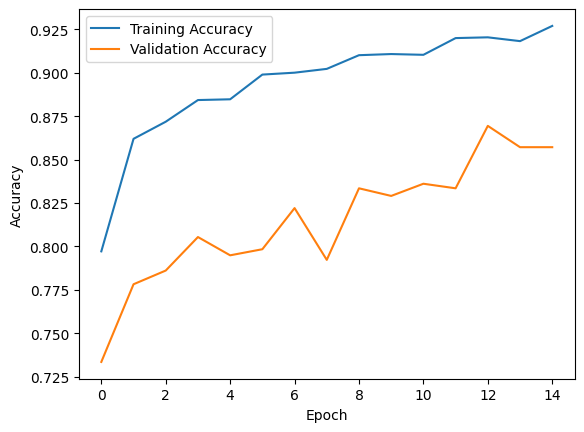

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 235ms/step


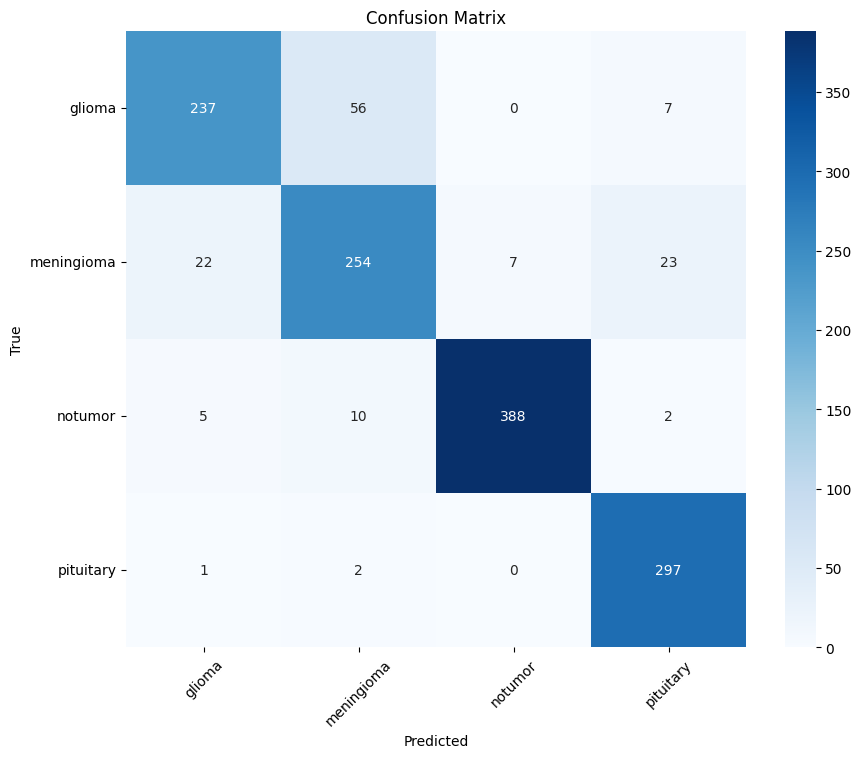


Classification Report:
              precision    recall  f1-score   support

      glioma       0.89      0.79      0.84       300
  meningioma       0.79      0.83      0.81       306
     notumor       0.98      0.96      0.97       405
   pituitary       0.90      0.99      0.94       300

    accuracy                           0.90      1311
   macro avg       0.89      0.89      0.89      1311
weighted avg       0.90      0.90      0.90      1311



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions
test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Optional: Print classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))